<a href="https://colab.research.google.com/github/nathencinoza/machine-learning/blob/main/BarPlot2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
df = pd.read_parquet('/content/drive/MyDrive/Orga 2/TP3/TP3 dataset music/train.parquet')

In [ ]:
df.columns

Index(['track_name', 'lyric', 'genre', 'language', 'popularity', 'artist',
       'a_genres', 'a_songs', 'a_popularity', 'did', 's-label', 'acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
       'time_signature', 'valence'],
      dtype='object')

In [ ]:
generos = ['Rock','Alternative','Dance',"Children’s Music",'Pop','Folk','Rap','R&B','Blues','Country','Ska','Hip-Hop','Indie','Soul']
df = df[df['genre'].isin(generos)]

In [ ]:
df2 = df[df['liveness'] > 0.8]

In [ ]:
df2 = df2['genre'].value_counts().reset_index(name="cant_canciones").rename(columns = {'index': 'genre'})

In [ ]:
df3 = df2.groupby('genre').sum().apply(lambda x: 100 * x / x.sum()).reset_index().sort_values('cant_canciones', ascending = False)

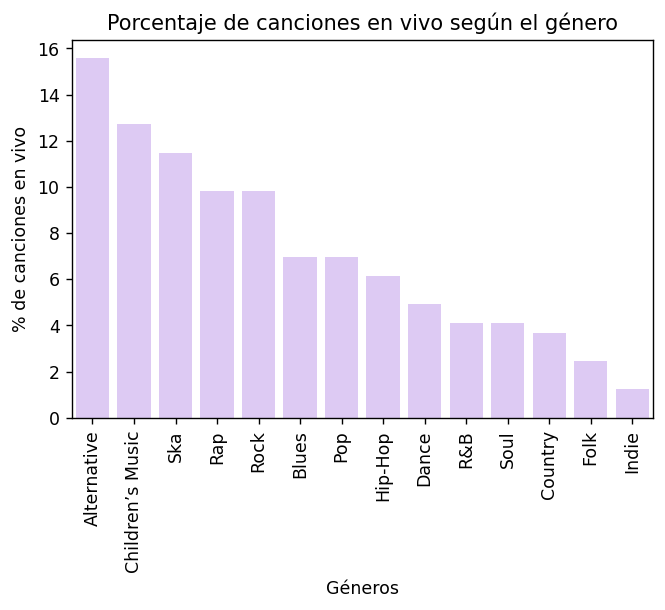

In [ ]:
plt.figure(dpi=125)
sns.barplot(x = 'genre', y = 'cant_canciones', data = df3, palette=["#ddc3fa"], ci = None)
plt.xticks(rotation=90)
plt.ylabel("% de canciones en vivo")
plt.xlabel("Géneros")
plt.title("Porcentaje de canciones en vivo según el género")
plt.show()